**линейный классификатор**

правило Розенблатта  

Евгений Борисов borisov.e@solarl.ru

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from time import time

def get_seed(): t = time() ; return int(((t%1)/(t//1))*1e11)

In [3]:
n_samples = 500
n_clst = 2 # количество классов

X,y = make_blobs( 
        n_samples=n_samples,
        centers=n_clst,  
        random_state=get_seed(),
        cluster_std=[1.0,1.5,]
    )

In [4]:
X.shape, y.shape

((500, 2), (500,))

In [5]:
# значение y это 1 или 0

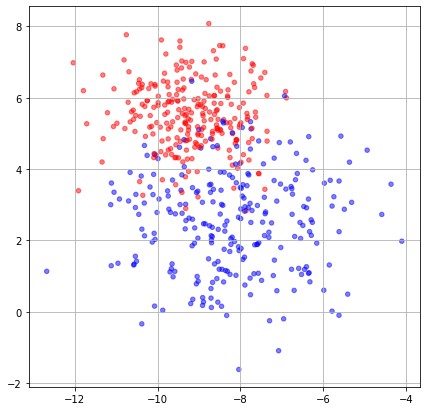

In [6]:
plt.figure(figsize=(7,7))
plt.scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
plt.grid()
plt.show()

---

In [7]:
# биннаризация X

In [8]:
n=50
b = np.vstack([ np.linspace(X[:,j].min()-1,X[:,j].max()+1,n) for j in range(X.shape[1]) ])

In [9]:
# b

In [10]:
Xp = np.hstack([
    np.hstack([ ( (b[j,i]<X[:,j])&(X[:,j]<b[j,i+1]) ).astype(int).reshape(X.shape[0],1) 
    for i in range(b.shape[1]-1) ])
    for j in range(X.shape[1])
])

Xp.shape

(500, 98)

In [11]:
# Xp

---

In [12]:
# инициализация параметров
W = np.random.normal(loc=0.0, scale=0.1, size=Xp.shape[1])
W 

array([-0.01621479,  0.08088547,  0.00959212,  0.06416785, -0.0603766 ,
        0.01099723,  0.01810841, -0.05019898,  0.28067273,  0.05217554,
        0.09086873,  0.31810824, -0.00445249,  0.01303226, -0.10524481,
       -0.06462774,  0.0849476 ,  0.04082283, -0.05191589, -0.11112292,
       -0.00407007, -0.07970001,  0.04181237, -0.04007276,  0.0636725 ,
        0.05556278, -0.10822734, -0.0451665 , -0.10478831,  0.18258421,
        0.22405733,  0.13268829,  0.02887193, -0.08472834,  0.13461074,
       -0.02525831, -0.05458658,  0.03158209, -0.11935274, -0.20918085,
        0.08506514, -0.1808617 ,  0.06346432,  0.01047553,  0.12950162,
       -0.00092499,  0.05846174, -0.29592662,  0.1115816 , -0.10937242,
        0.06298171, -0.21440916,  0.0155198 , -0.0579449 , -0.03678144,
        0.11676145, -0.13218985,  0.02879009,  0.0713915 ,  0.01851665,
       -0.02741334,  0.09975559,  0.0122397 ,  0.14395486, -0.04300697,
        0.02715373,  0.08624575, -0.12744892, -0.01809029, -0.18

In [13]:
def loss(x,w,y): return -x.dot(w)*y    

In [14]:
def accuracy(o,y,b=.5): return sum((o>b).astype(int)==y)/y.shape[0]

In [15]:
MAX_ITER = 10 # максимальное число циклов обучения
ACC_BOUND = .99

a=0.1 # скорость обучения
l = 0.5 # темп "забывания"

er_hist = [] # история ошибки

In [16]:
q = loss(Xp,W,y).sum()
er_hist.append(  accuracy( Xp.dot(W),y ) )

In [17]:
# метод стохастического градиентного спуска (SGD)
stop=False
for i in range(MAX_ITER):
    if stop: break
    for j in np.random.permutation(Xp.shape[0]):
        
        if er_hist[-1] > ACC_BOUND: # проверяем достижение порога
            print( 'acc bound on epoch %i step %i: %f'%(i,j,er_hist[-1]) )
            stop=True
            break

        xj,yj = Xp[j,:],y[j]
        
        r = (xj.dot(W)>0.5).astype(int) # выход
        W = W - a * xj.T.dot(r-y[j])
        
        # значение ф-ции потери
        qj = loss(xj,W,yj)
        q = l*qj +(1-l)*q
        
        
        er_hist.append( accuracy( Xp.dot(W), y ) )
        

In [18]:
print(W)
print(len(er_hist),er_hist[-1],min(er_hist))

[-0.01621479  0.08088547  0.00959212  0.06416785  0.1396234   0.01099723
  0.01810841 -0.05019898  0.08067273  0.05217554  0.09086873  0.41810824
  0.29554751  0.31303226  0.19475519  0.33537226  0.2849476   0.24082283
  0.24808411  0.28887708  0.09592993  0.12029999  0.24181237  0.25992724
  0.3636725   0.15556278  0.19177266  0.2548335   0.29521169  0.18258421
  0.52405733  0.33268829  0.42887193  0.51527166  0.43461074  0.37474169
  0.34541342  0.53158209  0.48064726 -0.20918085  0.38506514 -0.1808617
  0.26346432  0.31047553  0.12950162 -0.00092499  0.05846174 -0.29592662
  0.1115816  -0.10937242  0.06298171 -0.21440916  0.0155198   0.3420551
 -0.03678144  0.21676145 -0.13218985  0.02879009  0.4713915   0.31851665
  0.47258666  0.49975559  0.4122397   0.44395486  0.55699303  0.42715373
  0.38624575  0.47255108  0.48190971  0.5120897   0.44236509  0.41398542
  0.43743515  0.42731337  0.34732017  0.26160875  0.38076345  0.12004498
  0.12627758  0.41048462  0.07887583  0.12115376  0.1

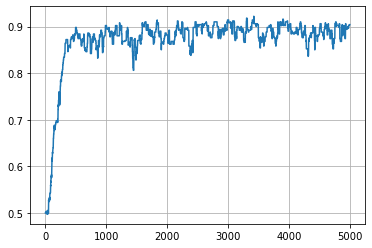

In [19]:
plt.plot(range(len(er_hist)),er_hist)
plt.grid()
plt.show()

---

In [20]:
o = Xp.dot(W)
accuracy( o,y ) 

0.904

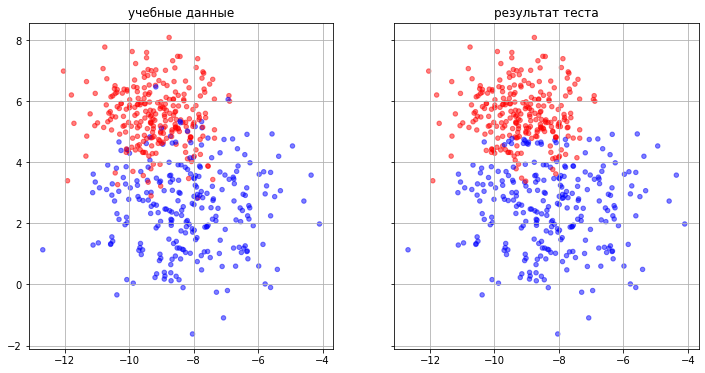

In [21]:
f, axarr = plt.subplots(1,2, sharex=True, sharey=True,figsize=(12,6),)
    
axarr[0].set_title('учебные данные')
axarr[0].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0) else 'r' for j in y ], 
             s=20,
             alpha=0.5 )
axarr[0].grid()

axarr[1].set_title('результат теста')
axarr[1].scatter( x=X[:,0], 
             y=X[:,1], 
             c=[ 'b' if(j>0.5) else 'r' for j in o ], 
             s=20,
             alpha=0.5 )
axarr[1].grid()

plt.show()
